### Importación de datos



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}


tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [25]:
def calcular_ingresos(df):
    return df["Precio"].sum()

ingresos = {nombre: calcular_ingresos(df) for nombre, df in tiendas.items()}
print("Ingresos por tienda:", ingresos)

Ingresos por tienda: {'Tienda 1': np.float64(1150880400.0), 'Tienda 2': np.float64(1116343500.0), 'Tienda 3': np.float64(1098019600.0), 'Tienda 4': np.float64(1038375700.0)}


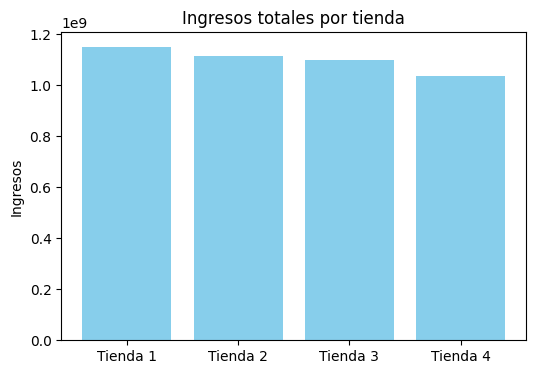

In [26]:
# Gráfico comparativo de ingresos
plt.figure(figsize=(6,4))
plt.bar(ingresos.keys(), ingresos.values(), color="skyblue")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos")
plt.show()

# 2. Ventas por categoría

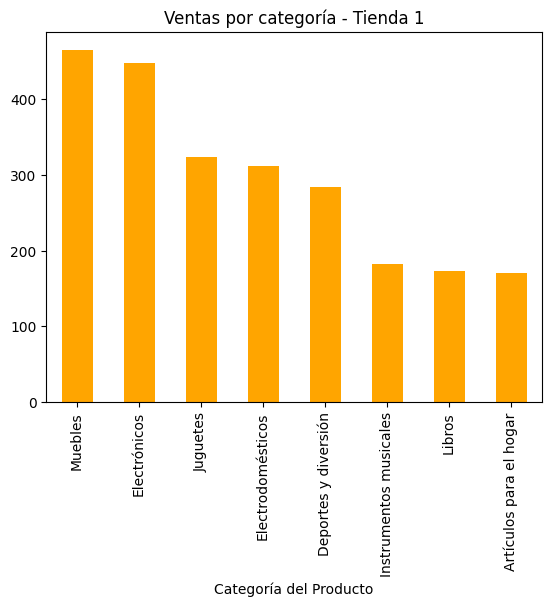

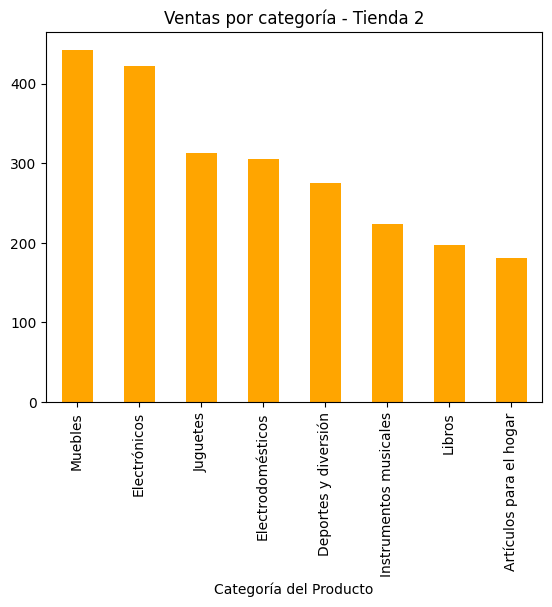

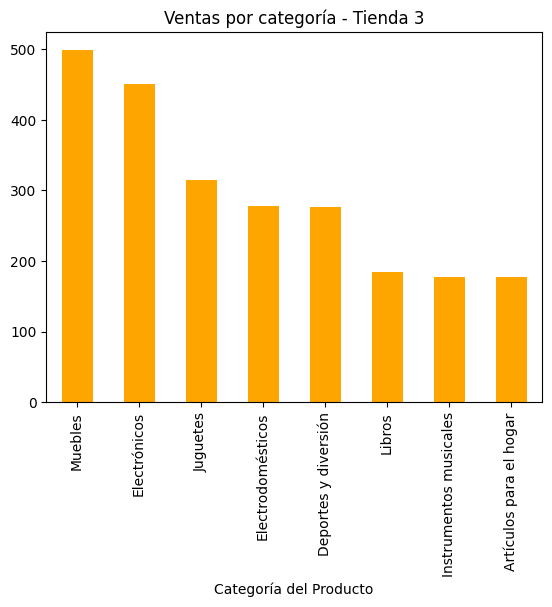

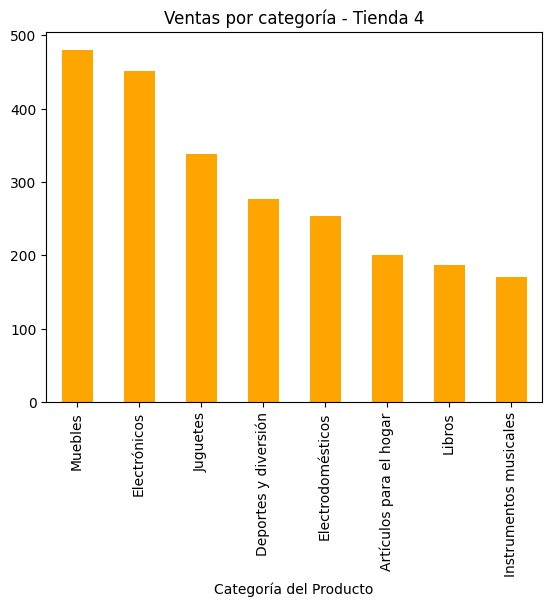

In [27]:
def ventas_categoria(df, nombre):
    categorias = df["Categoría del Producto"].value_counts()
    categorias.plot(kind="bar", title=f"Ventas por categoría - {nombre}", color="orange")
    plt.show()
    return categorias

ventas_categorias = {nombre: ventas_categoria(df, nombre) for nombre, df in tiendas.items()}

# 3. Calificación promedio de la tienda


In [28]:
def valoracion_media(df):
    return df["Calificación"].mean()

valoraciones = {nombre: valoracion_media(df) for nombre, df in tiendas.items()}
print("Valoraciones promedio:", valoraciones)

Valoraciones promedio: {'Tienda 1': np.float64(3.976685036032217), 'Tienda 2': np.float64(4.037303942348453), 'Tienda 3': np.float64(4.048325561678677), 'Tienda 4': np.float64(3.9957591178965224)}


# 4. Productos más y menos vendidos

Tienda 1 - Más vendidos:
 Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64
Tienda 1 - Menos vendidos:
 Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64


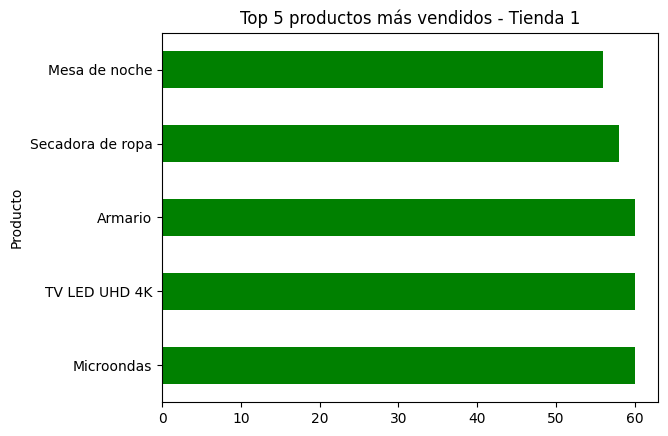

Tienda 2 - Más vendidos:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64
Tienda 2 - Menos vendidos:
 Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


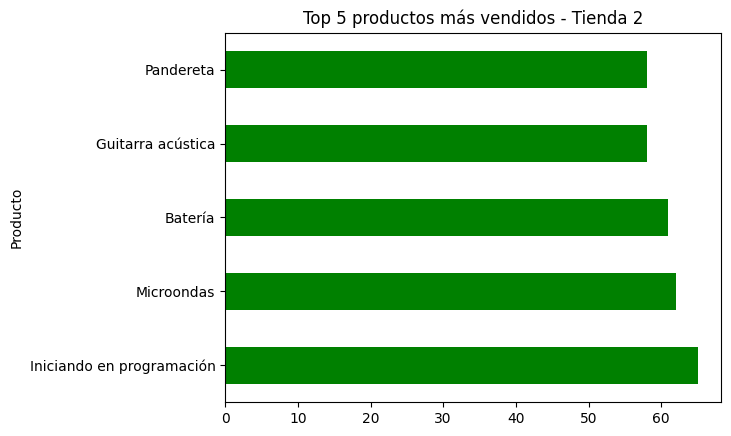

Tienda 3 - Más vendidos:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64
Tienda 3 - Menos vendidos:
 Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


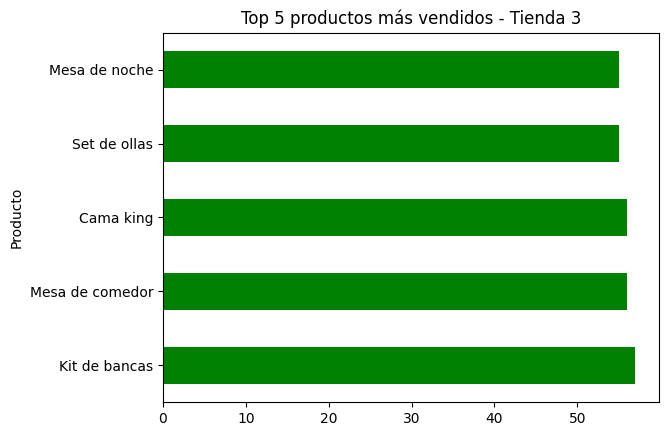

Tienda 4 - Más vendidos:
 Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64
Tienda 4 - Menos vendidos:
 Producto
Guitarra acústica     37
Armario               34
Guitarra eléctrica    33
Name: count, dtype: int64


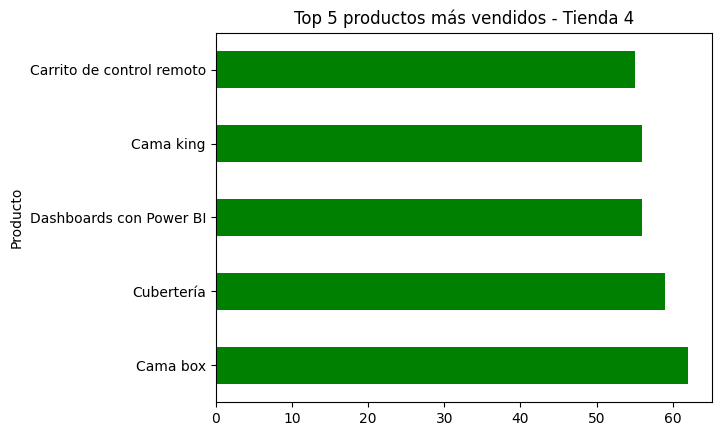

In [29]:
def productos_vendidos(df, nombre):
    productos = df["Producto"].value_counts()
    print(f"{nombre} - Más vendidos:\n", productos.head(3))
    print(f"{nombre} - Menos vendidos:\n", productos.tail(3))

    productos.head(5).plot(kind="barh", title=f"Top 5 productos más vendidos - {nombre}", color="green")
    plt.show()
    return productos

productos = {nombre: productos_vendidos(df, nombre) for nombre, df in tiendas.items()}

# 5. Envío promedio por tienda

In [30]:
def envio_promedio(df):
    return df["Costo de envío"].mean()

envios = {nombre: envio_promedio(df) for nombre, df in tiendas.items()}
print("Envío promedio por tienda: \n", envios)

Envío promedio por tienda: 
 {'Tienda 1': np.float64(26018.60958033065), 'Tienda 2': np.float64(25216.235693090293), 'Tienda 3': np.float64(24805.680373039424), 'Tienda 4': np.float64(23459.457167090754)}


#Informe Final – Análisis de las Tiendas Alura Store
##Introducción

El Sr. Juan busca vender una de sus cuatro tiendas de la cadena Alura Store con el fin de obtener capital para un nuevo emprendimiento. Para apoyar esta decisión, se analizaron los datos de ventas, rendimiento y reseñas de las tiendas. El objetivo es identificar cuál es la menos eficiente, tomando en cuenta: ingresos totales, categorías de productos más y menos vendidas, calificaciones de los clientes, productos más y menos vendidos, y coste de envío promedio.

##Desarrollo del análisis
1. Ingresos totales

Los ingresos acumulados muestran una diferencia clara entre las tiendas:

Tienda 1: 1,150,880,400

Tienda 2: 1,116,343,500

Tienda 3: 1,098,019,600

Tienda 4: 1,038,375,700

👉 La Tienda 4 genera los ingresos más bajos de toda la cadena.

2. Categorías de productos

En todas las tiendas predominan Muebles y Electrónicos como categorías más vendidas.

Las menos vendidas en general son Artículos para el hogar, Instrumentos musicales y Libros.

La Tienda 4 presenta volúmenes de venta más bajos en categorías clave como Electrodomésticos (254) frente a otras tiendas que superan los 300 en esta categoría.

3. Valoraciones promedio

Las calificaciones reflejan la satisfacción de los clientes:

Tienda 1: 3.97

Tienda 2: 4.03

Tienda 3: 4.05

Tienda 4: 3.99

👉 Aunque no hay diferencias muy grandes, la Tienda 3 destaca con la mejor valoración (4.05) y la Tienda 1 tiene la más baja (3.97). La Tienda 4 queda en un punto intermedio (3.99).

4. Productos más y menos vendidos

Tienda 1: los más vendidos son Microondas, TV LED UHD 4K y Armario (60 ventas cada uno). Entre los menos vendidos se encuentran Auriculares con micrófono (33) y Celular ABXY (33).

Tienda 2: el más vendido es Iniciando en programación (65), mientras que Juego de mesa (32) es el menos vendido.

Tienda 3: los más vendidos son Kit de bancas (57) y Cama king (56). Los menos vendidos incluyen Bloques de construcción (35).

Tienda 4: destacan Cama box (62) y Cubertería (59), mientras que los menos vendidos son Armario (34) y Guitarra eléctrica (33).

👉 Se observa que la Tienda 4 tiene más productos con baja rotación en comparación con otras tiendas.

5. Coste de envío promedio

Tienda 1: 26,018

Tienda 2: 25,216

Tienda 3: 24,805

Tienda 4: 23,459

👉 La Tienda 4 tiene el coste de envío más bajo, lo cual es positivo; sin embargo, esto no compensa sus menores ingresos ni la baja rotación de algunos productos clave.

Conclusión y Recomendación

Tras el análisis realizado, se recomienda que el Sr. Juan venda la Tienda 4.

Las razones son:

Es la tienda con menores ingresos totales de toda la cadena (1,038 millones).

Tiene categorías clave con menor desempeño (ejemplo: electrodomésticos con solo 254 ventas, frente a más de 300 en las otras tiendas).

Sus productos menos vendidos reflejan baja rotación y problemas de inventario.

Aunque presenta el coste de envío más bajo, este aspecto no compensa sus debilidades en ingresos y volumen de ventas.

En contraste, la Tienda 3 se muestra como la más sólida por su buena calificación promedio, diversidad de productos y desempeño en ventas.

✅ Por lo tanto, la venta de la Tienda 4 permitirá al Sr. Juan liberar capital de un negocio menos eficiente y concentrar sus esfuerzos en tiendas con mejor rendimiento y proyección.